In [4]:
import os
import mcpy as mcpy
print(mcpy.version)
N = int((1/(1-0.95))*10**5)
print(N)

0.1b
1999999


# Resistors in the Wheatstone Bridge
## Resistors R21, R22, R3
### Resistor R21
For resistors, it's safe to assume a rectangular distribution, due to the fact that there is no special
knowledge about the possible values within the interval. Thus, it's assumed that it is equally
probable to lie anywhere within it.

According to the corresponding datasheets S102C.pdf [3, p. 1] the resistance tolerance is given
by +-0,005

R(1.000E+02, 1.000E+02) uc = 2.887E-03


UnboundLocalError: local variable 'result' referenced before assignment

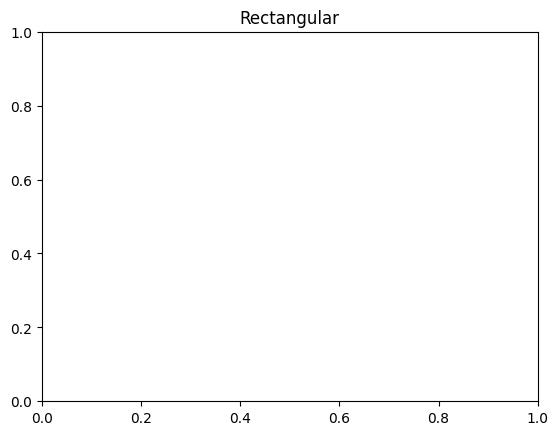

In [5]:
R21_ = 100                       # Ohm
delta_a_R21_ = (5e-3 * R21_) / 100    # Ohm
R21 = mcpy.Rectangular(R21_, delta_a_R21_)
print(R21)
R21.plot(N)

### Resistor R22
According to the corresponding datasheets VCS301.pdf [4, p. 1] the resistance tolerance is given
by +-1%.

In [ ]:
R22_ = 4e-3                    # Ohm
delta_a_R22_ = (1 * R22_) / 100    # Ohm
R22 = mcpy.Rectangular(R22_, delta_a_R22_)
print(R22)
R22.plot(N)

In [ ]:
R3_ = 10e3                   # Ohm
delta_a_R3_ = (5e-3 * R3_) / 100    # Ohm
R3 = mcpy.Rectangular(R3_, delta_a_R3_)
print(R3)
R3.plot(N)

In [ ]:
R4_ = 10e3
delta_R4_ = 0.5
R4 = mcpy.Rectangular(R4_, delta_R4_)
print(R4)
R4.plot(N)

## Uncertainties of the voltage measurements, u(UH) and u(U0)
The values of the 25 measurements are saved in the comma-separated-values (CSV)
file `VoltageMeasurments.csv`, with **U0** in the first column and **UH** in the second (both in Volts).
**U0** has been measured with the multimeter range *100mV* and **UH** with the range of *1V*.

In [ ]:
import pandas as pd
measurements = pd.read_csv("VoltageMeasurements.csv", sep=',', names=['u0', 'uh'])

In [ ]:
U0_mean = mcpy.DirectObservations(measurements['u0'])
print(f"{U0_mean.vnom:.3E}, sigma: {U0_mean.std:.3E}, ustd: {U0_mean.ustd:.3E}")
U0_mean.plot(N)

In [ ]:
UH_mean = mcpy.DirectObservations(measurements['uh'])
print(f"{UH_mean.vnom:.3E}, sigma: {UH_mean.std:.3E}, ustd: {UH_mean.ustd:.3E}")
UH_mean.plot(N)

## Standard uncertainty due to the accuracy u(U0;1)
u(U0;1) is the standard uncertainty due to the accuracy of the multimeter for the choosen
range. The range for U0 has been set to 100mV , the tightes tolerance is given with treading
U01 = 40e-3% and has to be applied on the reading as well as trange
U01 = 20e-3% for the
range.

In [ ]:
U01_ = 100e-3                  # Ohm
delta_a_U01_ = (40e-3 * U0_mean.vnom + 20e-3*U01_) / 100    # Ohm
U01 = mcpy.Rectangular(U01_, delta_a_U01_)
print(U01)
U01.plot(N)

u(U0;2) is the standard uncertainty due to the digitization of the multimeter for the choosen
range. The range for U0 has been set to 100mV , the tightes tolerance is given with tResolution
U0;2 = 10:00 10􀀀6V . Since the range hast been set to 100mV the bounds aU0;2 has to be calculated
by using the range:

In [ ]:
U02_ = 100e-3                  # Ohm
delta_a_U02_ = (10e-6 /2)    # Ohm
print(delta_a_U02_)
U02 = mcpy.Rectangular(U02_, delta_a_U02_)
print(U02)
U02.plot(N)

Standard uncertainty due to the accuracy u(UH;1)
u(UH;1) is the standard uncertainty due to the accuracy of the multimeter for the choosen range.
The range for UH has been set to 1V , the tightes tolerance is given with treading
UH;1
= 30:00  10􀀀3%
and has to be applied on the reading as well as trange
UH;1
= 10:00  10􀀀3% for the range.
Assuming a rectangluar distribution, a can be be determined by:


In [ ]:
UH1_ = 1
delta_a_UH1_ = (30e-3 * UH_mean.vnom + 10e-3*UH1_) / 100    # Ohm
print(delta_a_UH1_)
UH1 = mcpy.Rectangular(UH1_, delta_a_UH1_)
print(UH1)
UH1.plot(N)

In [ ]:
UH2_ = 100e-3                  # Ohm
delta_a_UH2_ = (100e-6 /2)    # Ohm
print(delta_a_UH2_)
UH2 = mcpy.Rectangular(UH2_, delta_a_UH2_)
print(UH2)
UH2.plot(N)

## Uncertainty of the Pt100 resistance deviation
At the measurement temperature, the tolerance of the Pt100 sensor (the maximum deviation
from the standard characteristic line) is given on the calibration certificate as +-6.7m.

In [ ]:
delta_R1 = mcpy.Rectangular(0, 6.7e-3)
print(delta_R1)
delta_R1.plot(N)

## Uncertainty of the self heating
The self heating has been noted by a colleague as normally distributed with a mean of 6:7103
and a relative expanded uncertainty of Ur(s) = 40:00% for a coverage factor of k = 3.

In [ ]:
uexp = ((40e-3*19e-3)/100)
u_delta_theta = mcpy.Normal(6.7e-3, uexp, 3)
print(u_delta_theta)
u_delta_theta.plot(N)

# Monte Carlo Analysis

In [ ]:
RZ = mcpy.Uncertainty(vnom=105e-3)
RZ.plot(N)

In [ ]:
R2 = R21.rand(N) + R22.rand(N)
R2.plot(N)

In [ ]:
R3.plot(N)

In [ ]:
R4.plot(N)

In [ ]:
UH = UH_mean.rand(N) - UH1.rand(N) - UH2.rand(N)
#UH_mean.plot(N)
#UH1.plot(N)
#UH2.plot(N)
UH.plot(N)

In [ ]:
U0 = U0_mean.rand(N) - U01.rand(N) - U02.rand(N)
#U0_mean.plot(N)
#U01.plot(N)
#U02.plot(N)
U0.plot(N)

In [ ]:
RL = mcpy.Uncertainty(vnom=42e-3)
# R1 = (R2 + RZ.rand(N)) * (( UH.rand(N) * ( R3.rand(N) + RZ.rand(N) ) - U0.rand(N) *
#                     ( R3.rand(N) + R4.rand(N) + 2 * RZ.rand(N)) ) /
#                   ( U0.rand(N) * ( R3.rand(N) + R4.rand(N) + 2 * RZ.rand(N) )
#                     + UH.rand(N) * ( R4.rand(N) + RZ.rand(N) ) )) \
#      - RL.rand(N) - RZ.rand(N) + delta_R1.rand(N)
R1 = (R2 + RZ) * (( UH * ( R3 + RZ ) - U0 *
                    ( R3 + R4 + 2 * RZ) ) /
                  ( U0 * ( R3 + R4 + 2 * RZ )
                    + UH * ( R4 + RZ ) )) \
     - RL - RZ + delta_R1
R1.plot(N)
print(R1)